# Introduction
### 1. Importing data using pandas
To use pandas, first import pandas using the alias pd. To import a CSV file, you can use the ```read_csv()``` function and pass the name of the file you want to import.

In [1]:
# Import pandas into the environment
import pandas as pd

# Import marketing.csv 
marketing = pd.read_csv('../data/marketing1.csv')

### 2. Inspecting data
Once you've imported your data, it is a good practice to examine its contents using the ```head()``` method. This will return the first five rows of the DataFrame.

In [2]:
# Print the first five rows of the DataFrame
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

### 3. Summary statistics
Use the ```describe()``` method to print the statistics of all columns in your dataset. You can inspect the output to find some obvious errors. For example, if you see negative values in a date column, this might indicate an error. In addition, pay careful attention to the minimum and maximum values. If the maximum is much larger than the median, it might be an outlier and merit further investigation.

In [3]:
# Print the statistics of all columns
print(marketing.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

### 4. Missing values & data types
Finally, you can identify the data types and the number of non-missing values in your DataFrame using the ```info()``` method. The result includes all columns and their data types.

In [4]:
# Check column data types and non-missing values
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None


### 5. Common data types
Each column in a pandas DataFrame has a specific data type. Some of the common data types are strings (which are represented as objects), numbers, boolean values (which are True/False) and dates. You can use the ```dtype``` attribute if you are interested in knowing the data type of a single column.

In [5]:
# Check the data type of is_retained
print(marketing['is_retained'].dtype)

object


### 6. Changing the data type of a column
To change the data type of a column, you can use the ```astype()``` method. For example, you saw on the earlier slide that the converted column is stored as an object. It contains True and False values, so it's more appropriate to store it as a boolean. You can use the ```astype()``` method along with the argument 'bool' as shown here to change its data type. If you check the data type of the 'converted' column again, you will see that it's now 'bool'.

In [6]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

bool


### 7. Mapping values to existing columns
Due to the way pandas stores data, in a large dataset, it can be computationally inefficient to store columns of strings. In such cases, it can speed things up to instead store these values as numbers. To create a column with channel codes, build a dictionary that maps the channels to numerical codes. Then, use the ```map()``` method on the channel column along with this dictionary, as shown here.

In [7]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

### 8. Creating new boolean columns
The marketing_channel column captures the channel a user saw a marketing asset on. Say you want to have a column that identifies if a particular marketing asset was a house ad or not. You can use numpy's ```where()``` function to create a new boolean column to establish this. The first argument is an expression that checks whether the value in the marketing_channel column is 'House Ads', the second argument is the value you want to assign if the expression is true, and the third argument is the value you want to assign if the expression is false.

In [8]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

# Import numpy
import numpy as np

# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

### 9. Date columns
Often, you will have date columns that are improperly read as objects by pandas. However, as you will see in the following lessons, having date columns properly imported as the datetime datatype has several advantages. You have two options to ensure that certain columns are treated as dates. First, when importing the dataset using the ```read_csv()``` function, you can pass a list of column names to the ```parse_dates``` argument to ensure that these columns are correctly interpreted as date columns.

In [9]:
# Import marketing.csv with date columns
marketing = pd.read_csv('../data/marketing1.csv', 
                        parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

## Explotary Data Analysis

### 1. How many users see marketing assets?
To begin, let's get a sense of how many unique users see our marketing assets each day. We can use the ```groupby()``` method on the marketing DataFrame. To group by date, we pass 'date_served' as the argument to ```groupby()```. Next, we select the user_id column outside of the ```groupby()``` and use ```nunique()``` method to count the number of unique users each day. Looks like about 300 users each day see our ads.

In [10]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


### 2. Visualizing results
As you saw on the previous slide, it's not easy to interpret results when they're printed in a table. It's much easier to notice fluctuations in our metrics when we plot them. We first ```import matplotlib.pyplot as plt```. Then, we plot the series daily_users. It's good practice to always add title and labels to your plot in order to clearly convey what information the chart contains. You can add a title using ```plt.title()```, and add x and y labels using ```plt.xlabel() and ```plt.ylabel()``` functions, respectively. We also rotate the ```xticks```, in this case, the date labels, by 45 degrees to increase legibility. Finally, don't forget to include a call to ```plt.show()``` to display the plot.

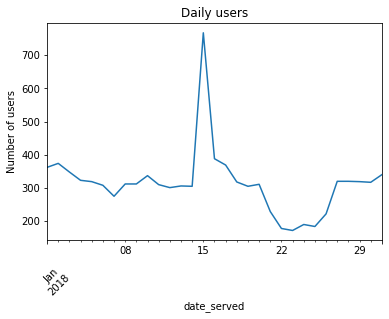

In [11]:
import matplotlib.pyplot as plt
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

As you can see, while the first half of the month sticks around 300 users per day, there's a huge spike in the middle of the month. This may be because we sent out a big marketing email, which reached many users who are not daily visitors of the site. These are the kinds of fluctuations we want to be aware of before diving in and calculating metrics.